In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_reg = pd.read_csv(r"C:\Users\Shailendra29\PycharmProjects\Analytics Vidhya\Building_First_ML_Model\KNN_Model\Synergix_data_preprocessed_new.csv")

In [7]:
data_reg.head()

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Units_sold>1000
0,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,1
1,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,0
2,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0
3,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,1
4,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,0


In [8]:
data_reg.drop("Units_sold>1000", axis=1, inplace=True)

In [9]:
ratings_ratio = []
ratio = 0
for row in data_reg.values:
  if (row[4] + row[5]==0):
    if (row[7] + row[8] == 0):
      ratings_ratio.append(0.0)
    else:
      ratings_ratio.append(-99999)
  else:
    ratio = (int(row[7]) + int(row[8])) / (int(row[4]) + int(row[5]))
    ratings_ratio.append(ratio)

max_rating = max(ratings_ratio)
for e in ratings_ratio:
  if (e == -99999):
    e = max_rating

In [16]:
for e in range(len(ratings_ratio)):
  new_value = round(ratings_ratio[e], ndigits=3)
  ratings_ratio[e] = new_value

In [17]:
ratings_ratio

[21.784,
 18.398,
 20.275,
 16.171,
 26.811,
 17.607,
 0.0,
 22.139,
 11.765,
 -99999,
 18.394,
 14.017,
 19.597,
 24.941,
 38.324,
 12.248,
 19.492,
 21.087,
 17.91,
 0.0,
 23.789,
 28.047,
 22.657,
 14.222,
 0.0,
 1.426,
 14.912,
 18.224,
 9.439,
 17.083,
 7.651,
 0.0,
 45.0,
 30.951,
 20.103,
 24.349,
 17.304,
 2.663,
 26.326,
 19.837,
 0.0,
 22.0,
 17.607,
 7.494,
 16.895,
 22.845,
 17.338,
 18.545,
 17.0,
 25.91,
 0.0,
 20.155,
 17.338,
 13.318,
 20.707,
 15.667,
 0.0,
 0.0,
 19.761,
 13.899,
 23.843,
 16.547,
 0.0,
 21.667,
 -99999,
 16.779,
 14.886,
 15.452,
 16.106,
 16.889,
 14.114,
 0.0,
 15.044,
 15.461,
 1.426,
 18.739,
 2.663,
 0.0,
 13.502,
 10.974,
 12.423,
 18.667,
 0.0,
 14.066,
 22.647,
 26.545,
 15.692,
 23.818,
 0.0,
 17.025,
 11.568,
 31.0,
 18.311,
 16.299,
 21.469,
 17.524,
 18.898,
 0.0,
 0.0,
 18.07,
 16.299,
 0.0,
 12.923,
 0.0,
 8.37,
 22.054,
 14.031,
 16.667,
 24.386,
 18.593,
 13.168,
 11.748,
 0.0,
 19.554,
 26.487,
 29.047,
 18.474,
 26.391,
 0.0,
 15.12

In [18]:
data_reg["Good_by_Bad_Ratings"] = ratings_ratio

In [19]:
data_reg.head()

,Page_traffic,Unit_price,Units_sold,Segment,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,...,Sum of Spend,Online_Clicks,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Good_by_Bad_Ratings
0,5835.0,22.214389,2071,Skincare,99.0,72.0,194.0,453.0,3272.0,6.0,...,0.0,1271.0,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,21.784
1,1881.0,11.870778,681,Skincare,118.0,73.0,200.0,430.0,3084.0,9.0,...,0.0,494.0,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,18.398
2,2477.0,27.645714,875,Makeup,108.0,85.0,232.0,511.0,3402.0,10.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,20.275
3,4087.0,16.896848,1396,Makeup,82.0,64.0,167.0,303.0,2058.0,5.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,16.171
4,1446.0,16.357664,822,Hair Care,29.0,24.0,88.0,200.0,1221.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,26.811


Performing one-hot encoding on "Segment" Column

In [21]:
data_reg = pd.get_dummies(data=data_reg, columns=["Segment"], drop_first=True, prefix="Segment")

In [22]:
data_reg.head()

,Page_traffic,Unit_price,Units_sold,1_Star_Rating,2_Star_Rating,3_Star_Rating,4_Star_Rating,5_Star_Rating,Image_Count,Bullet_Count,...,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Good_by_Bad_Ratings,Segment_Makeup,Segment_Skincare
0,5835.0,22.214389,2071,99.0,72.0,194.0,453.0,3272.0,6.0,6.0,...,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,21.784,False,True
1,1881.0,11.870778,681,118.0,73.0,200.0,430.0,3084.0,9.0,8.0,...,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,18.398,False,True
2,2477.0,27.645714,875,108.0,85.0,232.0,511.0,3402.0,10.0,7.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,20.275,True,False
3,4087.0,16.896848,1396,82.0,64.0,167.0,303.0,2058.0,5.0,7.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,16.171,True,False
4,1446.0,16.357664,822,29.0,24.0,88.0,200.0,1221.0,0.0,8.0,...,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,26.811,False,False


In [23]:
data_reg.drop(columns=["1_Star_Rating", "2_Star_Rating", "3_Star_Rating", "4_Star_Rating", "5_Star_Rating"], axis=1, inplace=True)

In [25]:
data_reg.head()

,Page_traffic,Unit_price,Units_sold,Image_Count,Bullet_Count,Title_Count,Description_Length,num_unique_Search_Terms,Organic Search Rank,Num_of_Promotions,...,Online_Cost,Online_Impressions,num_unique_campaigns,Clicks_video,Cost_video,Impressions_video,num_unique_campaigns_offline,Good_by_Bad_Ratings,Segment_Makeup,Segment_Skincare
0,5835.0,22.214389,2071,6.0,6.0,89.0,141.0,3.0,3.0,0.0,...,3102.448115,238075.0,6.0,3479.0,40244.28,3856872.0,2.0,21.784,False,True
1,1881.0,11.870778,681,9.0,8.0,126.0,149.0,13.0,16.0,0.0,...,1723.716359,75868.0,2.0,0.0,0.00,0.0,0.0,18.398,False,True
2,2477.0,27.645714,875,10.0,7.0,152.0,186.0,4.0,20.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,20.275,True,False
3,4087.0,16.896848,1396,5.0,7.0,117.0,209.0,7.0,20.0,0.0,...,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,16.171,True,False
4,1446.0,16.357664,822,0.0,8.0,165.0,158.0,4.0,16.0,0.0,...,0.000000,0.0,0.0,6024.0,77040.81,7539723.0,2.0,26.811,False,False


Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
y = data_reg["Units_sold"]
X = data_reg.drop("Units_sold", axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13741, 21), (5890, 21), (13741,), (5890,))

Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)

In [40]:
X_test_scaled = scaler.transform(X_test)

KNN regression model

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
knn_reg_model = KNeighborsRegressor() #k=5 default

In [43]:
knn_reg_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [45]:
y_train_pred = knn_reg_model.predict(X_train_scaled)

In [46]:
y_pred = knn_reg_model.predict(X_test_scaled)

In [47]:
y_pred

array([1355.8, 1182.4,    0. , ..., 1146.6,  676.6, 1726.4])

Model Evaluation

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [50]:
test_MAE = mean_absolute_error(y_pred, y_test)
test_RMSE = sqrt(mean_squared_error(y_pred, y_test))
print(test_MAE)
print(test_RMSE)

197.20013582342952
263.8839281801426


In [51]:
from sklearn.metrics import r2_score

In [53]:
train_r_2_score = r2_score(y_train, y_train_pred)
test_r_2_score  = r2_score(y_test, y_pred)
print(f"Train R2 score: {train_r_2_score}" )
print(f"Test R2 score: {test_r_2_score}" )

Train R2 score: 0.7918273105616814
Test R2 score: 0.6685872440582178


Adjusted R2 Score

In [54]:
X_train_scaled.shape, y_train.shape

((13741, 21), (13741,))

In [58]:
train_n = X_train.shape[0]
train_p = X_train.shape[1]
test_n = X_test.shape[0]
test_p = X_test.shape[1]

In [64]:
train_adjusted_r2 = 1 - (((1-(train_r_2_score)**2)*(train_n -1)) / ((train_n - train_p - 1)))
test_adjusted_r2 = 1 - (((1-(test_r_2_score)**2)*(test_n -1)) / ((test_n - test_p - 1)))
print(f"Adjusted R2 score (train): {train_adjusted_r2}")
print(f"Adjusted R2 score (test): {test_adjusted_r2}")

Adjusted R2 score (train): 0.6264195152112755
Adjusted R2 score (test): 0.44502989592371345


In [70]:
train_score = []
test_score = []

for k in range(1,51):
  knn_model_n = KNeighborsRegressor(n_neighbors=k)
  knn_model_n.fit(X_train_scaled, y_train)
  y_train_pred_n = knn_model_n.predict(X_train_scaled)
  train_score.append(r2_score(y_train, y_train_pred_n))

  y_pred_n = knn_model_n.predict(X_test_scaled)
  test_score.append(r2_score(y_test, y_pred_n))

In [71]:
import seaborn as sns
sns.set_style("whitegrid")

Text(0.5, 1.0, 'Train and Test R2 score at different values of K')

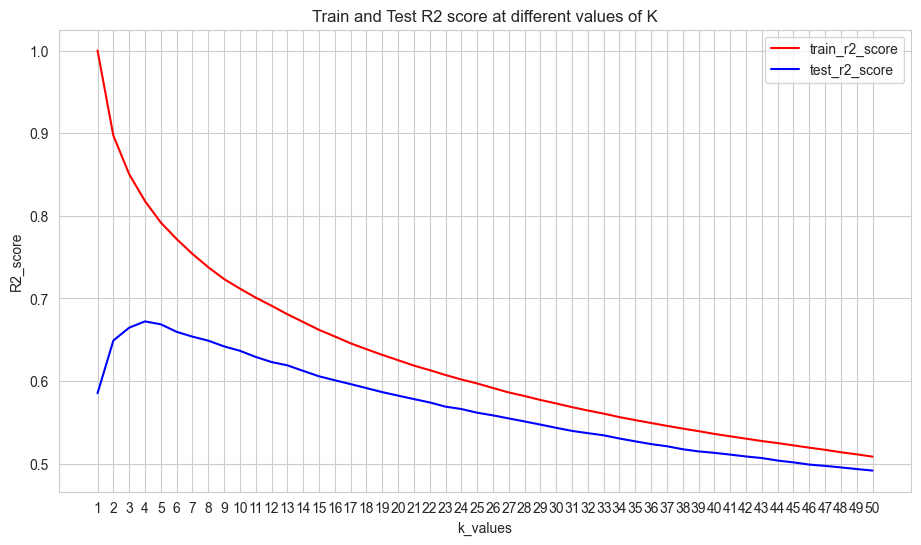

In [77]:
plt.figure(figsize=(11,6), dpi=100)
sns.lineplot(x=np.arange(1,51), y=train_score, label="train_r2_score", color="red")
sns.lineplot(x=np.arange(1,51), y=test_score, label="test_r2_score", color="blue")
plt.xticks(np.arange(1,51))
plt.xlabel("k_values")
plt.ylabel("R2_score")
plt.title("Train and Test R2 score at different values of K")

from the graph we can see that at k=4, the test data achieves maximum r-score

In [78]:
knn_model_4 = KNeighborsRegressor(n_neighbors=4)

In [79]:
knn_model_4.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=4)

In [80]:
y_train_pred_4 = knn_model_4.predict(X_train_scaled)

In [81]:
y_pred_4 = knn_model_4.predict(X_test_scaled)

In [83]:
r2_score(y_test, y_pred_4)

0.6721463643180072